Direções (radianos): [1.57079633 1.58824962 1.76278254 1.67551608 1.6231562  1.51843645]
Velocidades: [2.6 2.2 1.8 3.6 1.5 1.9]


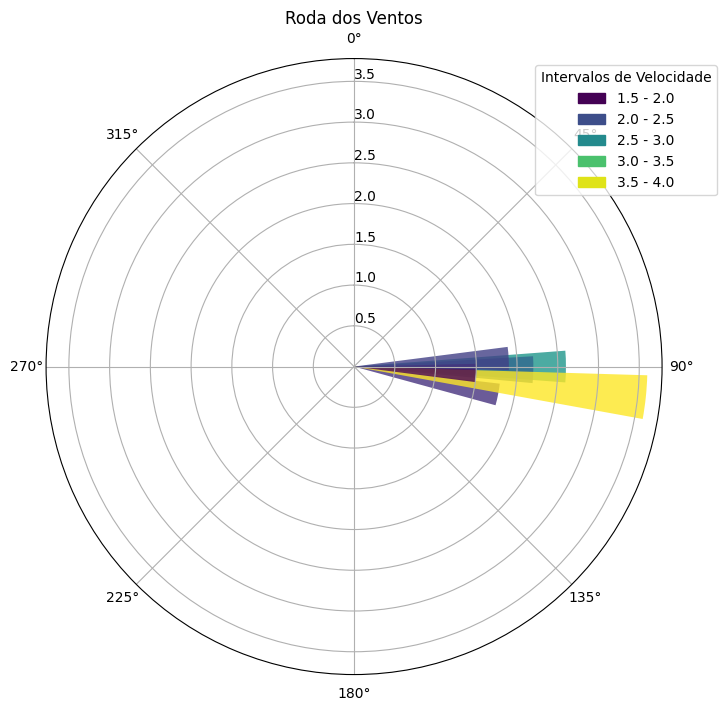

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Carregar os dados do Excel
df = pd.read_excel('C:/Users/tdw07/Downloads/teste.xlsx')  # Substitua pelo caminho do seu arquivo Excel

# Verificar se as colunas estão presentes
if 'DIRECAO' not in df.columns or 'VELOCIDADE' not in df.columns:
    raise ValueError("As colunas 'DIRECAO' ou 'VELOCIDADE' não estão presentes no arquivo Excel.")

# Extrair as colunas de interesse
velocidades = df['VELOCIDADE'].values
direcoes = np.radians(df['DIRECAO'].values)  # Converter direções para radianos

# Imprimir os valores para verificação
print("Direções (radianos):", direcoes)
print("Velocidades:", velocidades)

# Verificar se o array de velocidades não está vazio
if len(velocidades) == 0:
    raise ValueError("O array de velocidades está vazio. Verifique os dados no arquivo Excel.")
else:
    # Determinar o menor e o maior valor de velocidade
    min_velocidade = min(velocidades)
    max_velocidade = max(velocidades)

    # Normalizar as velocidades para mapeamento de cores
    norm = plt.Normalize(vmin=min_velocidade, vmax=max_velocidade)
    cmap = plt.get_cmap('viridis')

    # Configurações da "Roda dos Ventos"
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='polar')

    # Aumentar a largura das barras para maior visibilidade
    bars = ax.bar(direcoes, velocidades, width=0.15, bottom=0.0)

    # Customização das cores
    for bar, velocidade in zip(bars, velocidades):
        norm_velocidade = norm(velocidade)
        bar.set_facecolor(cmap(norm_velocidade))
        bar.set_alpha(0.8)

    # Definir intervalos para a legenda
    intervals = np.arange(min_velocidade, max_velocidade + 0.5, 0.5)
    labels = [f'{i} - {i + 0.5}' for i in intervals[:-1]]
    colors = [cmap(norm(i)) for i in intervals[:-1]]

    # Adicionar uma legenda com intervalos específicos
    legend_patches = [patches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
    ax.legend(handles=legend_patches, title='Intervalos de Velocidade', bbox_to_anchor=(1.1, 1))

    # Títulos e rótulos
    ax.set_title('Roda dos Ventos')
    ax.set_theta_direction(-1)
    ax.set_theta_offset(np.pi / 2.0)
    ax.set_rlabel_position(0)
    plt.show()
